<a href="https://colab.research.google.com/github/NevesJulio/Exercicios_DL/blob/main/Exerc%C3%ADcioDL_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exercício 1 - Regressão Linear


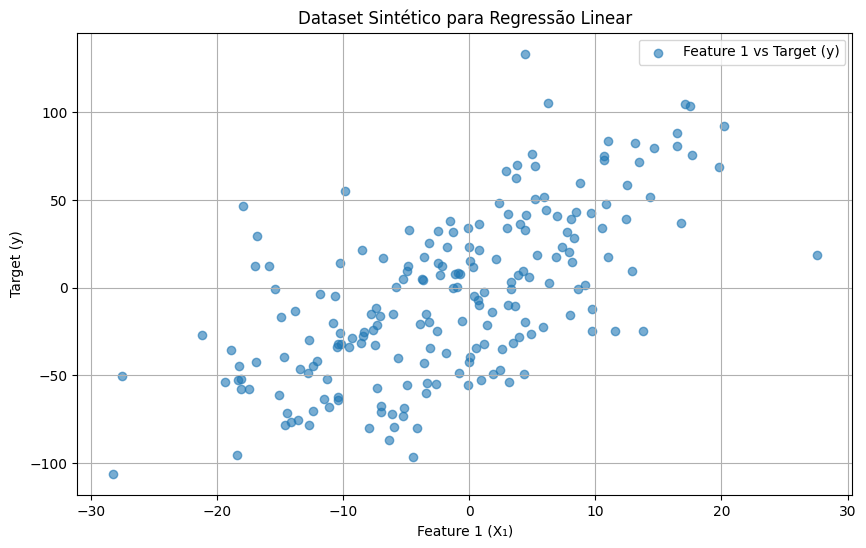

Dimensão de X: torch.Size([200, 3])
Dimensão de y: torch.Size([200, 1])


In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(13)

Pesos_verdadeiros = torch.tensor([[3.2], [1.2], [-3.0]])
vies_verdadeiro = 0.5

num_points = 200
X = torch.randn(num_points, 3) * 10  # (200, 3)

ruido = torch.randn(num_points, 1) * 16
y = X @ Pesos_verdadeiros + vies_verdadeiro + ruido

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0].numpy(), y.numpy(), label="Feature 1 vs Target (y)", alpha=0.6)
plt.title("Dataset Sintético para Regressão Linear")
plt.xlabel("Feature 1 (X₁)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Dimensão de X: {X.shape}")
print(f"Dimensão de y: {y.shape}")


In [10]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__() # Adicionado: Chama o construtor da classe pai (nn.Module)
        self.linear = nn.Linear(in_features=3, out_features=1)

    def forward(self, x):
        return self.linear(x)

In [11]:
modelo = LinearRegressionModel()
print("Estrutura do modelo:")
print(modelo)

Estrutura do modelo:
LinearRegressionModel(
  (linear): Linear(in_features=3, out_features=1, bias=True)
)


In [13]:
print("Parâmetros iniciais (aleatórios):")
for name, param in modelo.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data.numpy()}")

Parâmetros iniciais (aleatórios):
linear.weight: [[-0.23581666 -0.5137399  -0.46824867]]
linear.bias: [-0.19857433]


In [14]:

learning_rate = 0.001
epochs = 200

loss_function = nn.MSELoss()

optimizer = torch.optim.SGD(modelo.parameters(), lr=learning_rate)

In [15]:
from tqdm import tqdm

losses = []

for epoch in tqdm(range(epochs), desc="Treinando o modelo"):

    y_pred = modelo(X)

    loss = loss_function(y_pred, y)
    losses.append(loss.item())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

print("\nTreinamento concluído!")
print(f"Perda final: {losses[-1]:.4f}")

print("\nParâmetros aprendidos pelo modelo:")
for name, param in modelo.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data.numpy()}")

Treinando o modelo: 100%|██████████| 200/200 [00:00<00:00, 1680.61it/s]


Treinamento concluído!
Perda final: 240.0971

Parâmetros aprendidos pelo modelo:
linear.weight: [[ 3.214756   1.0295303 -2.8627524]]
linear.bias: [-0.29778236]


Os pesos previstos pelo modelo [ 3.214756   1.0295303 -2.8627524] Estão bem próximos dos pesos definidos [[3.2], [1.2], [-3.0]] portanto a rede foi efetiva para aproximar os dados com 3 features.

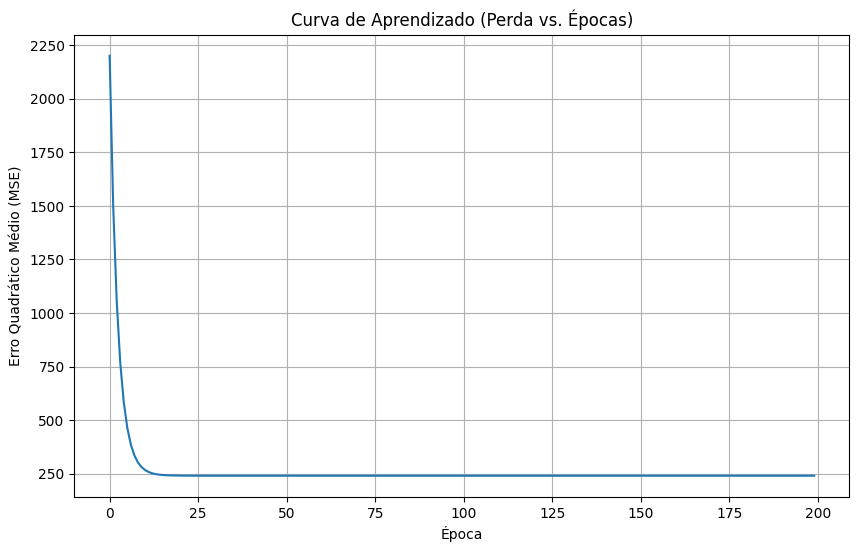

In [16]:

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses)
plt.title("Curva de Aprendizado (Perda vs. Épocas)")
plt.xlabel("Época")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.grid(True)
plt.show()

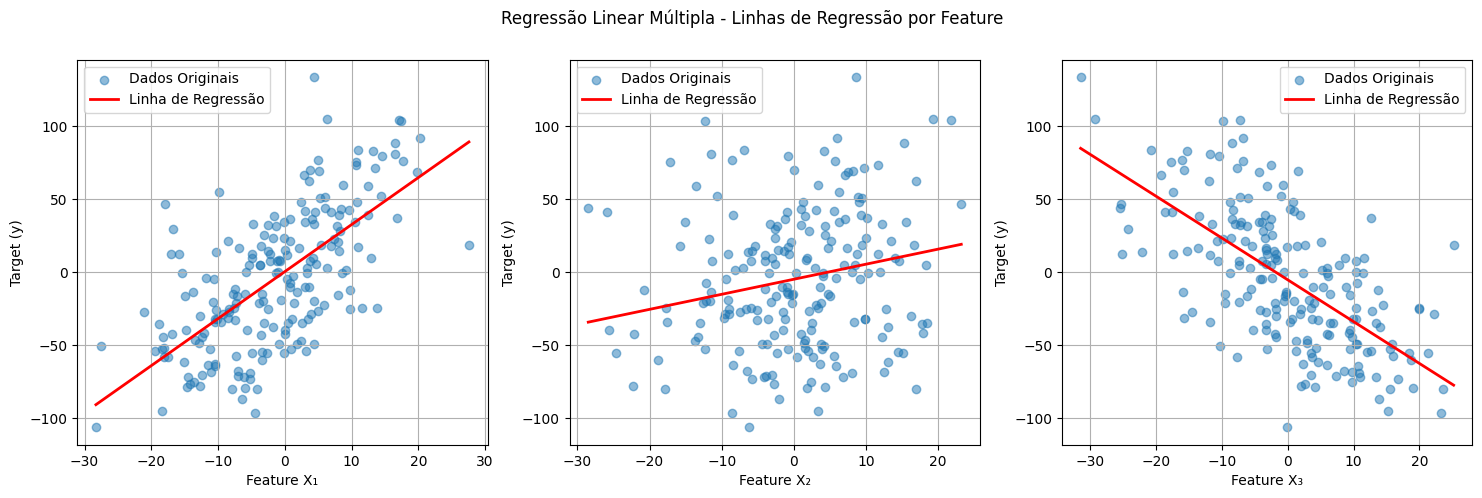

In [26]:
import torch
import matplotlib.pyplot as plt

modelo.eval()

# Médias das features
X_mean = X.mean(dim=0)

# Criar figuras lado a lado
plt.figure(figsize=(18, 5))
features = ["X₁", "X₂", "X₃"]

for i in range(3):
    # Gerar valores para a feature i
    xi_range = torch.linspace(X[:, i].min(), X[:, i].max(), 200).unsqueeze(1)

    # Criar matriz de entrada fixa para as outras features
    X_fixed = X_mean.repeat(200, 1)   # (200,3)
    X_fixed[:, i] = xi_range[:, 0]    # substitui a i-ésima coluna pela faixa de valores

    # Previsão para a linha
    with torch.no_grad():
        y_pred_line = modelo(X_fixed)

    # Plot
    plt.subplot(1, 3, i+1)
    plt.scatter(X[:, i].numpy(), y.numpy(), label="Dados Originais", alpha=0.5)
    plt.plot(xi_range.numpy(), y_pred_line.numpy(), color='red', linewidth=2, label="Linha de Regressão")
    plt.xlabel(f"Feature {features[i]}")
    plt.ylabel("Target (y)")
    plt.legend()
    plt.grid(True)

plt.suptitle("Regressão Linear Múltipla - Linhas de Regressão por Feature")
plt.show()


##Exercício 2 - Regressão Linear

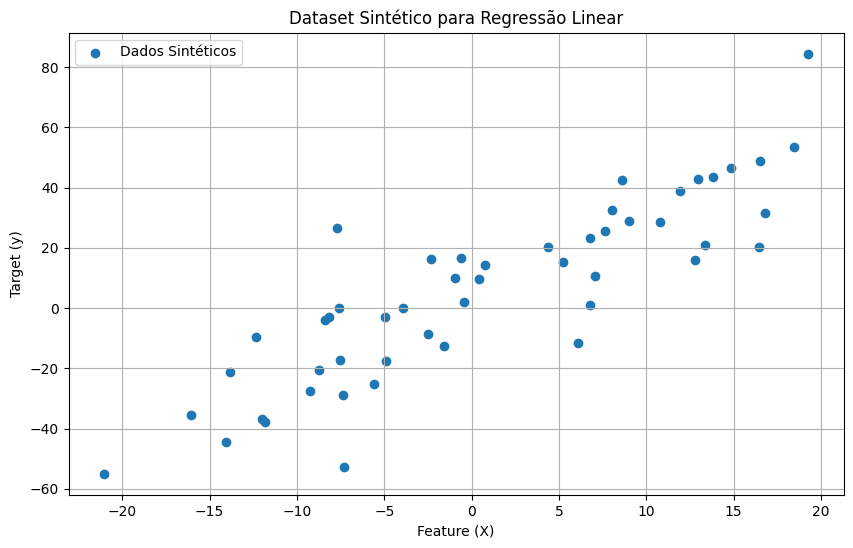

Dimensão de X: torch.Size([50, 1])
Dimensão de y: torch.Size([50, 1])


In [27]:
# Geração de Dados Sintéticos para Regressão
import torch
import numpy as np
import matplotlib.pyplot as plt

# Configurações para reprodutibilidade
torch.manual_seed(42)

# Definindo os parâmetros verdadeiros do nosso modelo (que tentaremos aprender)
true_weight = 2.5
true_bias = 0.8

num_points = 50
# Gerando os dados de entrada (features)
X = torch.randn(num_points, 1) * 10

# Gerando os dados de saída (alvos) com base nos parâmetros e adicionando ruído
# y = w*X + b + ruído
noise = torch.randn(num_points, 1) * 16
y = true_weight * X + true_bias + noise

# Visualizando os dados gerados
plt.figure(figsize=(10, 6))
plt.scatter(X.numpy(), y.numpy(), label="Dados Sintéticos")
plt.title("Dataset Sintético para Regressão Linear")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.show()

# Imprimindo as dimensões dos tensores
print(f"Dimensão de X: {X.shape}")
print(f"Dimensão de y: {y.shape}")

Parâmetros encontrados pela Equação Normal:
Peso (w): 2.4918
Bias (b): 3.5830


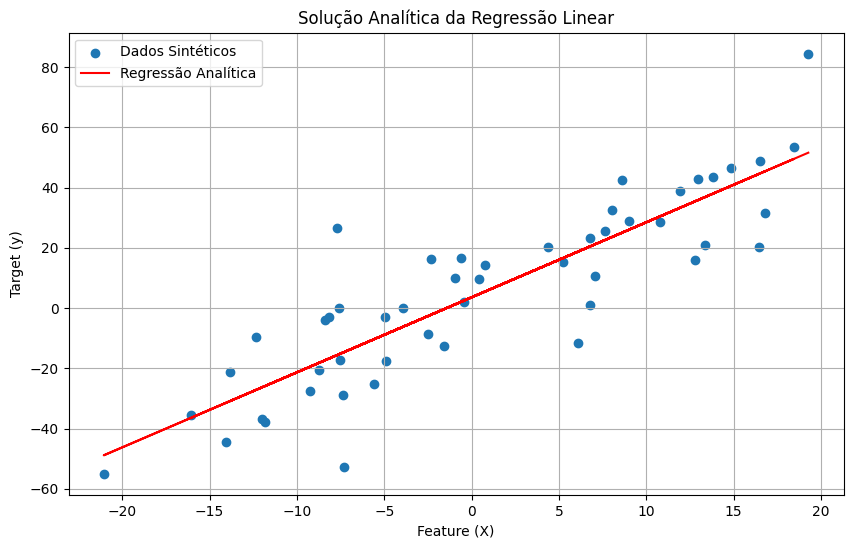

--- Parâmetros verdadeiros (para comparação) ---
Peso real: 2.5
Bias real: 0.8


In [28]:
# Solução com a Equação Normal

# Preparando a matriz X_b adicionando uma coluna de 1s
X_b = torch.cat([torch.ones(X.shape[0], 1), X], dim=1)

# Calculando os parâmetros ótimos usando a Equação Normal
# theta = (X_b.T @ X_b)^-1 @ X_b.T @ y
try:
    theta_best = torch.inverse(X_b.T @ X_b) @ X_b.T @ y
    b_analytical = theta_best[0].item()
    w_analytical = theta_best[1].item()

    print(f"Parâmetros encontrados pela Equação Normal:")
    print(f"Peso (w): {w_analytical:.4f}")
    print(f"Bias (b): {b_analytical:.4f}")

    # Plotando o resultado
    plt.figure(figsize=(10, 6))
    plt.scatter(X.numpy(), y.numpy(), label="Dados Sintéticos")
    plt.plot(X.numpy(), (w_analytical * X + b_analytical).numpy(), color='r', label="Regressão Analítica")
    plt.title("Solução Analítica da Regressão Linear")
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.legend()
    plt.grid(True)
    plt.show()

except torch.linalg.LinAlgError:
    print("A matriz X_b.T @ X_b é singular e não pode ser invertida.")

print("--- Parâmetros verdadeiros (para comparação) ---")
print(f"Peso real: {true_weight}")
print(f"Bias real: {true_bias}")

In [ ]:
import torch.nn as nn


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

print("Parâmetros iniciais (aleatórios):")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data.numpy()}")

learning_rate = [1e-6, 0.001, 0.1]
epochs = 200

loss_function = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [29]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Dados sintéticos (exemplo univariado)
torch.manual_seed(13)
n_samples = 200
X = torch.randn(n_samples, 1) * 10
true_w = torch.tensor([[3.2]])
true_b = 0.5
noise = torch.randn(n_samples, 1) * 2
y = X @ true_w + true_b + noise

# Modelo
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)

# Learning rates e configuração
learning_rates = [1e-6, 0.001, 0.1]
epochs = 200

# Armazenar resultados
results = {}

for lr in learning_rates:
    torch.manual_seed(13)  # garante mesma inicialização para cada lr
    model = LinearRegressionModel()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    loss_history = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())

    # Armazena pesos finais e histórico de loss
    learned_w = model.linear.weight.data.item()
    learned_b = model.linear.bias.data.item()
    results[lr] = {
        "weight": learned_w,
        "bias": learned_b,
        "loss_history": loss_history
    }


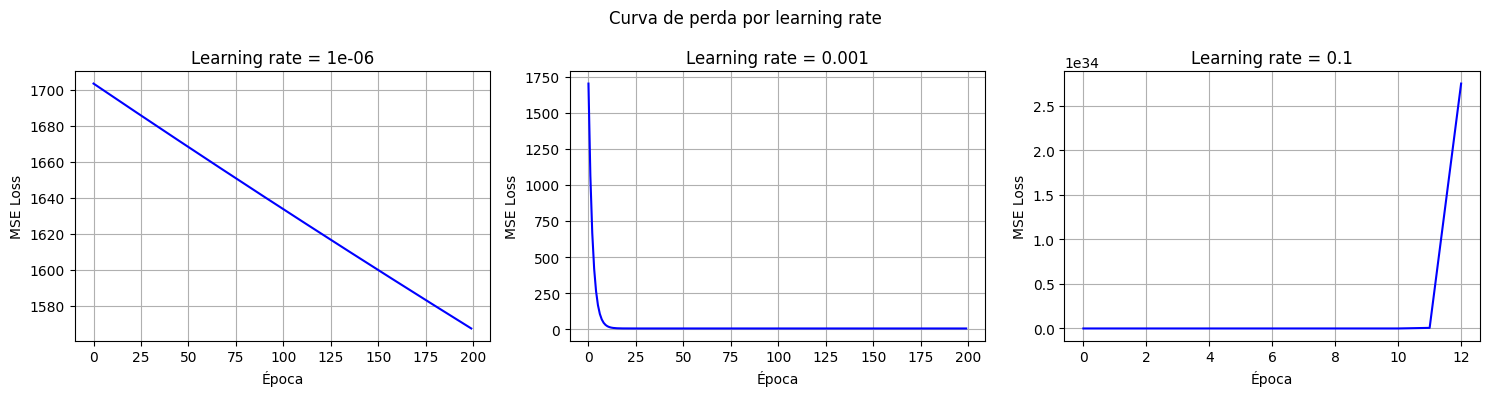

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))

for i, lr in enumerate(learning_rates):
    plt.subplot(1, 3, i+1)
    plt.plot(results[lr]['loss_history'], color='blue')
    plt.title(f"Learning rate = {lr}")
    plt.xlabel("Época")
    plt.ylabel("MSE Loss")
    plt.grid(True)

plt.suptitle("Curva de perda por learning rate")
plt.tight_layout()
plt.show()

Pode ser visto que comparando as 3 learning rates, a primeira, muito baixa, Demora muito para baixar e permanece alta por um longo tempo, convergindo totalmente só no final da última época, a segunda, equilibrada converge rapidamente de forma equilibrada. A terceira muito alta, nem mesmo converge, começa aleatoriamente e não consegue convergir pela learning rate dar passos muito altos para chegar a um valor de mínimo.

##Exercício 1 - Regressão Logistica


In [51]:
import torch
import matplotlib.pyplot as plt

n = 20
noise_std = 0.2  # Aumenta para visualizar melhor

# Dataset AND
X_and = torch.cat([
    torch.zeros(n, 2),
    torch.cat([torch.zeros(n,1), torch.ones(n,1)], 1),
    torch.cat([torch.ones(n,1), torch.zeros(n,1)], 1),
    torch.ones(n, 2)
], dim=0)
y_and = torch.cat([
    torch.zeros(n, 1),
    torch.zeros(n, 1),
    torch.zeros(n, 1),
    torch.ones(n, 1)
], dim=0)
X_and += torch.randn_like(X_or)*noise_std
y_and += torch.randn_like(y_or)*noise_std
y_and = torch.clamp(y_and, 0.0, 1.0)  # Garante que os targets fiquem entre 0 e 1



# Dataset OR
X_or = torch.cat([
    torch.zeros(n, 2),
    torch.cat([torch.zeros(n,1), torch.ones(n,1)], 1),
    torch.cat([torch.ones(n,1), torch.zeros(n,1)], 1),
    torch.ones(n, 2)
], dim=0)
y_or = torch.cat([
    torch.zeros(n, 1),
    torch.ones(n, 1),
    torch.ones(n, 1),
    torch.ones(n, 1)
], dim=0)
X_or += torch.randn_like(X_or)*noise_std
y_or += torch.randn_like(y_or)*noise_std
y_or = torch.clamp(y_or, 0.0, 1.0)  # Garante que os targets fiquem entre 0 e 1

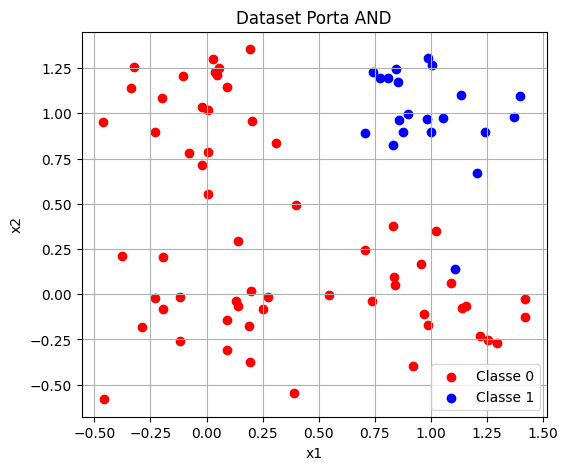

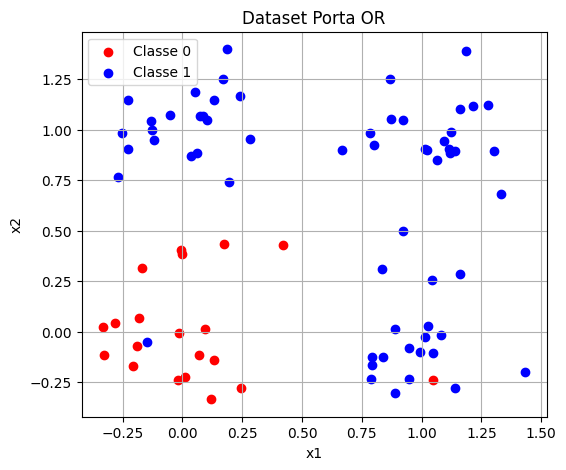

In [52]:
import matplotlib.pyplot as plt

# --- Porta AND ---
plt.figure(figsize=(6,5))
plt.scatter(X_and[y_and[:,0]<0.5, 0], X_and[y_and[:,0]<0.5, 1], color='red', label='Classe 0')
plt.scatter(X_and[y_and[:,0]>=0.5, 0], X_and[y_and[:,0]>=0.5, 1], color='blue', label='Classe 1')
plt.title("Dataset Porta AND")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

# --- Porta OR ---
plt.figure(figsize=(6,5))
plt.scatter(X_or[y_or[:,0]<0.5, 0], X_or[y_or[:,0]<0.5, 1], color='red', label='Classe 0')
plt.scatter(X_or[y_or[:,0]>=0.5, 0], X_or[y_or[:,0]>=0.5, 1], color='blue', label='Classe 1')
plt.title("Dataset Porta OR")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


In [53]:
from sklearn.model_selection import train_test_split

# --- Porta AND ---
X_train_and, X_test_and, y_train_and, y_test_and = train_test_split(
    X_and, y_and, test_size=0.2, random_state=42
)

# --- Porta OR ---
X_train_or, X_test_or, y_train_or, y_test_or = train_test_split(
    X_or, y_or, test_size=0.2, random_state=42
)

In [54]:
import torch
import torch.nn as nn
from tqdm import tqdm

# --- Definição da classe do modelo ---
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# --- Hiperparâmetros ---
learning_rate_clf = 0.1
epochs_clf = 300

# --- Função de perda ---
loss_function_clf = nn.BCELoss()

# --- Função para treinar um modelo ---
def train_model(X_train, y_train, X_test, y_test):
    model = LogisticRegressionModel()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate_clf)

    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in tqdm(range(epochs_clf), desc="Treinando"):
        model.train()
        y_pred_train = model(X_train)
        loss_train = loss_function_clf(y_pred_train, y_train)
        train_losses.append(loss_train.item())

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        # Acurácia treino
        predicted_labels_train = (y_pred_train >= 0.5).float()
        acc_train = (predicted_labels_train == y_train).float().mean()
        train_accuracies.append(acc_train.item())

        # Avaliação
        model.eval()
        with torch.no_grad():
            y_pred_test = model(X_test)
            loss_test = loss_function_clf(y_pred_test, y_test)
            test_losses.append(loss_test.item())

            predicted_labels_test = (y_pred_test >= 0.5).float()
            acc_test = (predicted_labels_test == y_test).float().mean()
            test_accuracies.append(acc_test.item())

    return model, train_losses, test_losses, train_accuracies, test_accuracies

# --- Treinar modelo AND ---
print("Treinando porta AND...")
model_and, train_losses_and, test_losses_and, train_acc_and, test_acc_and = train_model(
    X_train_and, y_train_and, X_test_and, y_test_and
)

# --- Treinar modelo OR ---
print("\nTreinando porta OR...")
model_or, train_losses_or, test_losses_or, train_acc_or, test_acc_or = train_model(
    X_train_or, y_train_or, X_test_or, y_test_or
)

# --- Resultados finais ---
print(f"\nPorta AND - Acurácia final de teste: {test_acc_and[-1]:.4f}")
print(f"Porta OR  - Acurácia final de teste: {test_acc_or[-1]:.4f}")


Treinando porta AND...


Treinando: 100%|██████████| 300/300 [00:00<00:00, 1293.73it/s]



Treinando porta OR...


Treinando: 100%|██████████| 300/300 [00:00<00:00, 1177.18it/s]


Porta AND - Acurácia final de teste: 0.4375
Porta OR  - Acurácia final de teste: 0.1875


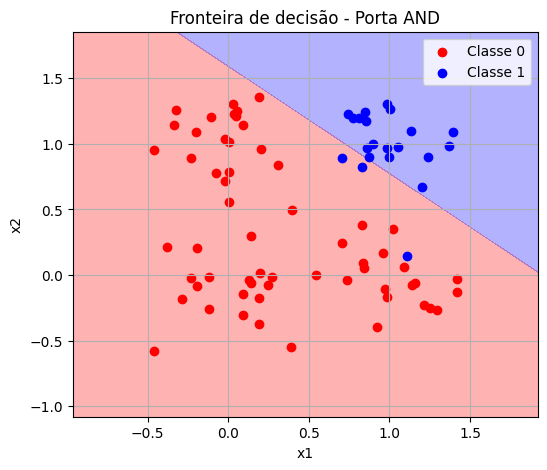

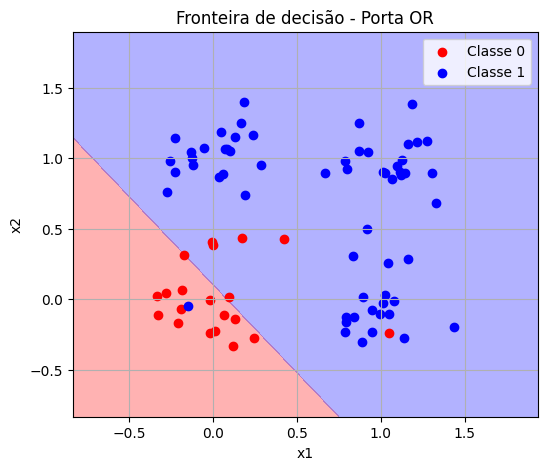

In [55]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y, title="Fronteira de decisão"):
    # Criar um grid de pontos no plano x1-x2
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Converter o grid para tensor
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

    # Predições do modelo
    model.eval()
    with torch.no_grad():
        probs = model(grid)
        Z = probs.reshape(xx.shape).numpy()

    # Plotando o contorno da fronteira de decisão
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=['red','blue'])
    plt.scatter(X[y[:,0]<0.5,0], X[y[:,0]<0.5,1], color='red', label='Classe 0')
    plt.scatter(X[y[:,0]>=0.5,0], X[y[:,0]>=0.5,1], color='blue', label='Classe 1')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(model_and, X_and, y_and, title="Fronteira de decisão - Porta AND")

plot_decision_boundary(model_or, X_or, y_or, title="Fronteira de decisão - Porta OR")


##Exercício 2 - Regressão Logistica

In [57]:
import torch
import matplotlib.pyplot as plt

n = 20
noise_std = 0.2  # Aumenta para visualizar melhor

# Dataset XOR
X_xor = torch.cat([
    torch.zeros(n, 2),
    torch.cat([torch.zeros(n,1), torch.ones(n,1)], 1),
    torch.cat([torch.ones(n,1), torch.zeros(n,1)], 1),
    torch.ones(n, 2)
], dim=0)

y_xor = torch.cat([
    torch.zeros(n, 1),
    torch.ones(n, 1),
    torch.ones(n, 1),
    torch.zeros(n, 1)
], dim=0)

X_xor += torch.randn_like(X_or)*noise_std
y_xor += torch.randn_like(y_or)*noise_std
y_xor = torch.clamp(y_and, 0.0, 1.0)  # Garante que os targets fiquem entre 0 e 1



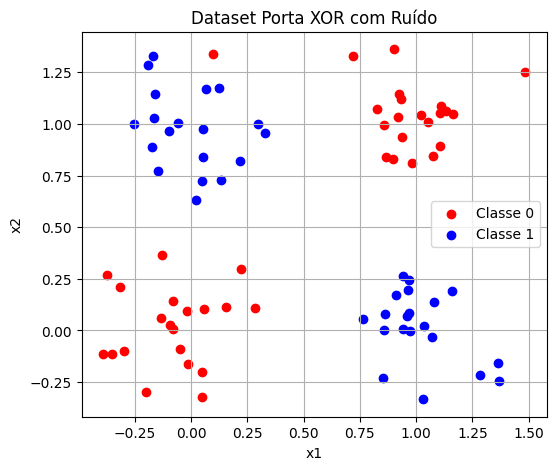

In [58]:
plt.figure(figsize=(6,5))
plt.scatter(X_xor[y_xor[:,0]<0.5,0], X_xor[y_xor[:,0]<0.5,1], color='red', label='Classe 0')
plt.scatter(X_xor[y_xor[:,0]>=0.5,0], X_xor[y_xor[:,0]>=0.5,1], color='blue', label='Classe 1')
plt.title("Dataset Porta XOR com Ruído")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


In [63]:
# --- Porta XOR ---
X_train_xor, X_test_xor, y_train_xor, y_test_xor = train_test_split(
    X_xor, y_xor, test_size=0.2, random_state=42
)


In [64]:
# --- Treinar modelo XOR ---
print("Treinando porta XOR")
model_xor, train_losses_xor, test_losses_xor, train_acc_xor, test_acc_xor = train_model(
    X_train_xor, y_train_xor, X_test_xor, y_test_xor
)

Treinando porta XOR


Treinando: 100%|██████████| 300/300 [00:00<00:00, 1072.04it/s]


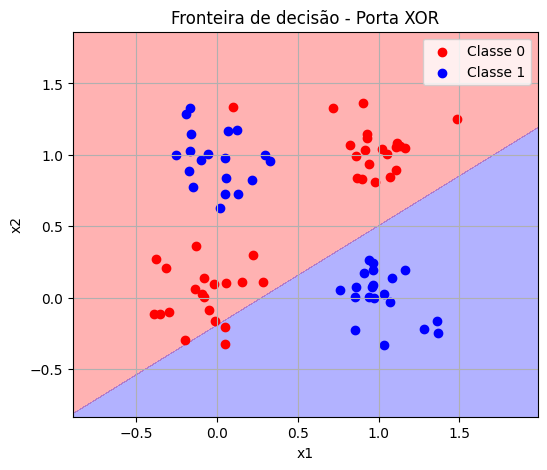

In [65]:
plot_decision_boundary(model_xor, X_xor, y_xor, title="Fronteira de decisão - Porta XOR")


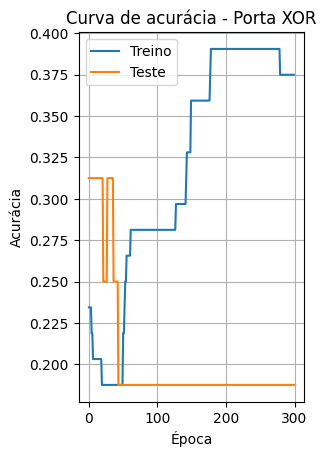

In [66]:
# Curva de acurácia
plt.subplot(1,2,2)
plt.plot(train_acc_xor, label="Treino")
plt.plot(test_acc_xor, label="Teste")
plt.title("Curva de acurácia - Porta XOR")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)

plt.show()

A acurácia máxima foi de menos de 33%, isso se da ao fato do XOR ser um modelo que não é linearmente separável, portanto, não consegue ser separado por um modelo de aprendizado linear.